**Final Exam Submission**


# 1. Imports and Dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ["OMP_NUM_THREADS"] = "1"

# 2. Data Loading and Preprocessing
## 2.1 Data Loading

In [18]:
df = pd.read_csv('ThermoFormingDefectiveParts.csv')

## 2.2 Exploratory Data Analysis

In [19]:
df

,MachineID,Period of Operations (Month),Number of Defective Parts Per Day
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40
...,...,...,...
195,196,120,79
196,197,126,28
197,198,126,74
198,199,137,18


## 2.3 Data Preprocessing

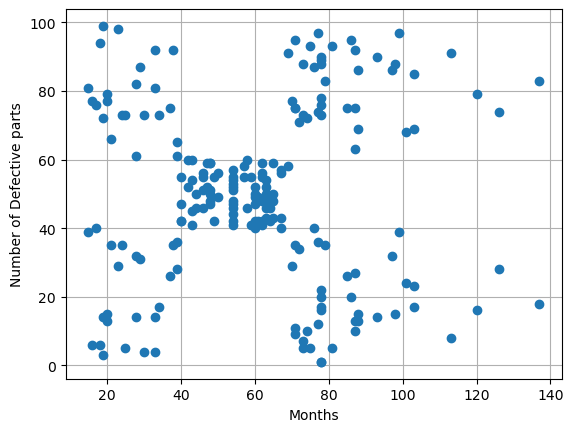

In [20]:
plt.plot(df['Period of Operations (Month)'], df['Number of Defective Parts Per Day'], marker = 'o', linestyle = 'none')
plt.xlabel('Months')
plt.ylabel('Number of Defective parts')
plt.grid()
plt.show()

## 2.4 Separate input and output and split dataset

In [21]:
#Split data into feature and target
X = df.iloc[:, [1, 2]].values

X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [22]:
# from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 42)

# # Assuming x_train is a pandas Series or 1D array - Might not need that
# x_train = x_train.values.reshape(-1, 1)  # Convert to 2D array
# x_test = x_test.values.reshape(-1, 1)  # Ensure x_test is also 2D

## 2.5 Scaling

# 3. Model Development
## 3.1 K Mean clustering

c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

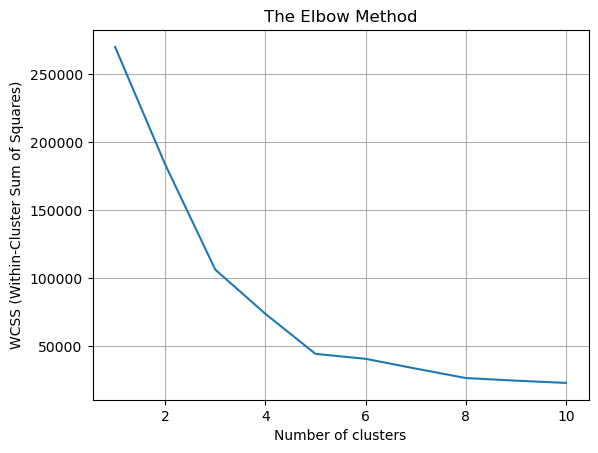

In [26]:
from sklearn.cluster import KMeans
# Initialize WCSS list
wcss = []

# Calculate WCSS for k = 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # WCSS value

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

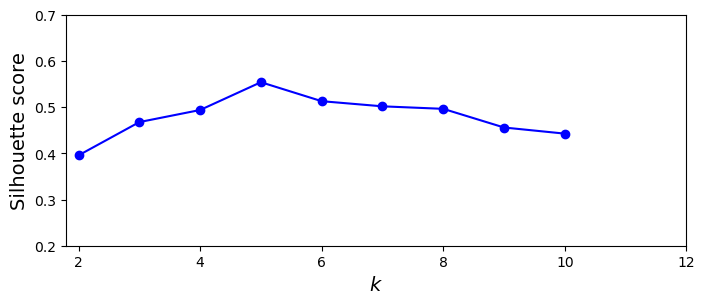

In [27]:
from sklearn.metrics import silhouette_score

SH = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    SH.append(score)

plt.figure(figsize=(8, 3))
plt.plot(range(2, 11), SH, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 12, 0.2, 0.7])
plt.show()

## 3.2 Gaussian Mixture

c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


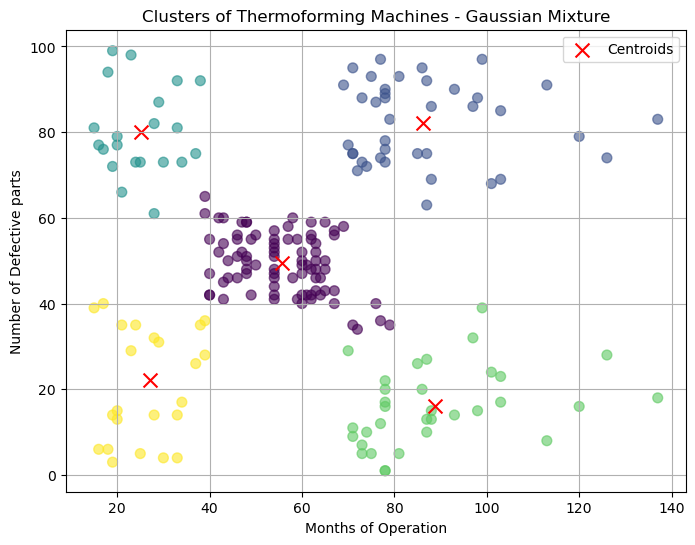

In [33]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)  # 4 clusters
gmm.fit(X)
labels = gmm.predict(X)

# Plot the GMM clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('Clusters of Thermoforming Machines - Gaussian Mixture')
plt.xlabel('Months of Operation')
plt.ylabel('Number of Defective parts')
plt.legend()
plt.grid()
plt.show()

# 4. Model Evaluation
## 4.1 Performance Metrics

In [28]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

c:\Users\kylea\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 4.2 Results Visualization

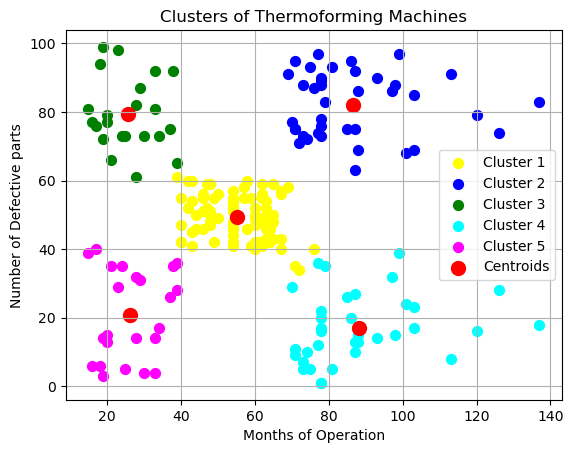

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters of Thermoforming Machines')
plt.xlabel('Months of Operation')
plt.ylabel('Number of Defective parts')
plt.grid()
plt.legend()
plt.show()

# 5. Conclusion